In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [65]:
d = yf.download(
                tickers="^NSEI",
                period='max',
                interval='1d',
                progress=False,
                timeout=10
            )

In [66]:
d['target'] = d.Open/d.Close.shift(-1)
d.target = d.target.apply(np.floor)
d.dropna(inplace=True)
x = d.drop(columns=['target', 'Adj Close', 'Volume'])
y = d.target
d.tail()

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2022-09-02,17598.400391,17643.849609,17476.449219,17539.449219,17539.449219,256300,0.0
2022-09-05,17546.449219,17683.150391,17540.349609,17665.800781,17665.800781,230300,0.0
2022-09-06,17695.699219,17764.650391,17587.650391,17655.599609,17655.599609,251200,1.0
2022-09-07,17519.400391,17650.750000,17484.300781,17624.400391,17624.400391,354100,0.0
2022-09-08,17748.150391,17807.650391,17691.949219,17798.750000,17798.750000,279800,0.0


In [67]:
print('No. of Bullish samples: {}'.format(y[y == 0].size))
print('No. of Bearish samples: {}'.format(y[y == 1].size))

No. of Bullish samples: 1873
No. of Bearish samples: 1796


In [68]:
scaler = StandardScaler()
x = scaler.fit_transform(x.to_numpy())
x

array([[-1.04775797, -1.05034425, -1.0451754 , -1.05342868],
       [-1.05422012, -1.04961627, -1.04552215, -1.0397368 ],
       [-1.03931878, -1.00006055, -1.02720167, -0.99029494],
       ...,
       [ 2.44928572,  2.44809545,  2.44951912,  2.44215132],
       [ 2.40249866,  2.41794369,  2.42195859,  2.43386473],
       [ 2.46320547,  2.45947843,  2.47733279,  2.48017241]])

In [14]:
from statistics import mode
from tabnanny import verbose
import tensorflow as tf
from keras import Sequential
from keras import Model
from keras.layers import Dense
from keras.optimizers import SGD
import keras

units = 1024
sgd = SGD(learning_rate=0.0001, momentum=0.0, nesterov=True)
kernel_init = 'he_uniform'
activation = 'relu'

callback_mc = keras.callbacks.ModelCheckpoint('best_model.h5',
                verbose=1,
                monitor='val_accuracy',
                save_best_only=True,
                mode='auto'
                )
callback_es = keras.callbacks.EarlyStopping(
                monitor='val_loss',
                mode='auto',
                verbose=0,
                patience=100
)

model = Sequential([
    Dense(512, kernel_initializer=kernel_init, activation=activation, input_dim=x.shape[1]),
    Dense(units, kernel_initializer=kernel_init, activation=activation),
    Dense(units, kernel_initializer=kernel_init, activation=activation),
    Dense(units, kernel_initializer=kernel_init, activation=activation),
    Dense(units, kernel_initializer=kernel_init, activation=activation),
    Dense(units, kernel_initializer=kernel_init, activation=activation),
    Dense(units//2, kernel_initializer=kernel_init, activation=activation),
    Dense(1, kernel_initializer=kernel_init, activation='sigmoid'),
])
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               2560      
                                                                 
 dense_25 (Dense)            (None, 1024)              525312    
                                                                 
 dense_26 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_30 (Dense)            (None, 512)              

In [15]:
history = model.fit(x, y, callbacks=[callback_mc, callback_es], batch_size=5, epochs=1000, validation_split=0.3, verbose=2)

Epoch 1/1000


2022-09-09 19:55:05.614398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-09 19:55:10.471287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.46685, saving model to best_model.h5
514/514 - 6s - loss: 0.7012 - accuracy: 0.5202 - val_loss: 0.8000 - val_accuracy: 0.4668 - 6s/epoch - 12ms/step
Epoch 2/1000

Epoch 2: val_accuracy did not improve from 0.46685
514/514 - 5s - loss: 0.6922 - accuracy: 0.5370 - val_loss: 0.7060 - val_accuracy: 0.4668 - 5s/epoch - 10ms/step
Epoch 3/1000

Epoch 3: val_accuracy improved from 0.46685 to 0.53951, saving model to best_model.h5
514/514 - 5s - loss: 0.6892 - accuracy: 0.5471 - val_loss: 0.6891 - val_accuracy: 0.5395 - 5s/epoch - 10ms/step
Epoch 4/1000

Epoch 4: val_accuracy did not improve from 0.53951
514/514 - 5s - loss: 0.6892 - accuracy: 0.5600 - val_loss: 0.6839 - val_accuracy: 0.5322 - 5s/epoch - 11ms/step
Epoch 5/1000

Epoch 5: val_accuracy did not improve from 0.53951
514/514 - 5s - loss: 0.6881 - accuracy: 0.5615 - val_loss: 0.6943 - val_accuracy: 0.4741 - 5s/epoch - 11ms/step
Epoch 6/1000

Epoch 6: val_accuracy did not improve from 0.53

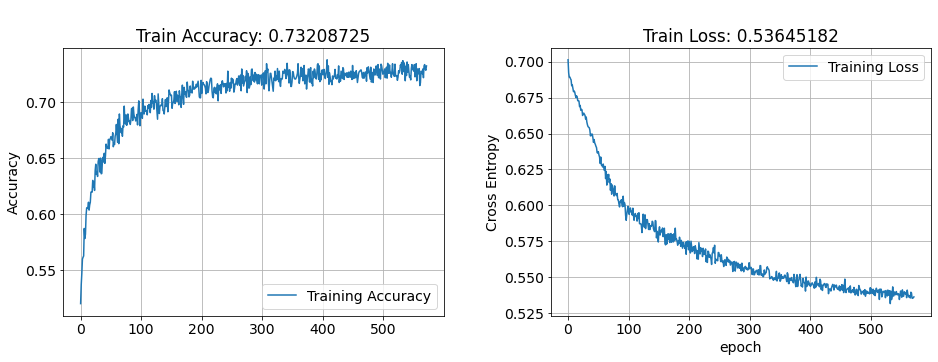

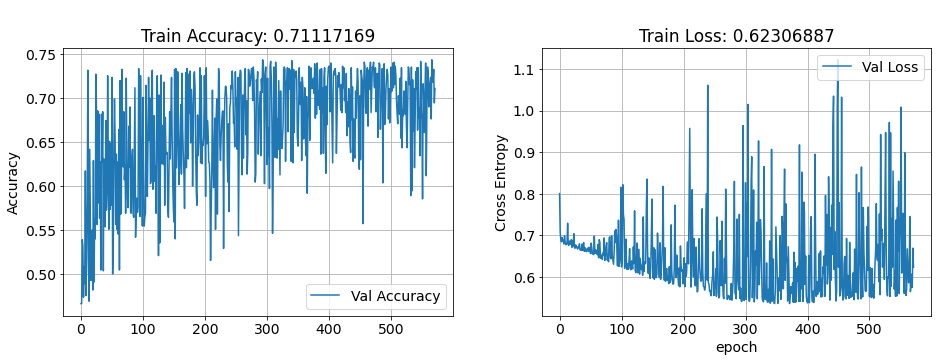

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(14,6))
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTrain Accuracy: {round(acc[-1],8)}')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'\nTrain Loss: {round(loss[-1],8)}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

acc = history.history['val_accuracy']
loss = history.history['val_loss']

plt.figure(figsize=(14,6))
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(1, 2, 1)
plt.plot(acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTrain Accuracy: {round(acc[-1],8)}')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Val Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'\nTrain Loss: {round(loss[-1],8)}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

## Try Realtime Inference

In [88]:
endpoint = keras.models.load_model('best_model_0.7438acc.h5')
today = yf.download(
                tickers="^NSEI",
                period='10d',
                interval='1d',
                progress=False,
                timeout=10
            )
today = today.drop(columns=['Adj Close', 'Volume'])
for i in range(-10,0):
    df = today.iloc[i]
    twr = today.iloc[i+1]['Close']
    df = scaler.transform([df])
    pred = endpoint.predict([df], verbose=0)

    if twr > today.iloc[i]['Open']:
        fact = "BULLISH"
    else:
        fact = "BEARISH"

    if pred > 0.5:
        out = "BEARISH"
    else:
        out = "BULLISH"
        
    print("{} Nifty Prediction -> Market may Close {} on {}! Actual -> {}, Prediction -> {}".format(
            today.iloc[i].name.strftime("%d-%m-%Y"),
            out,
            (today.iloc[i].name + pd.Timedelta(days=1)).strftime("%d-%m-%Y"),
            fact,
            "Correct" if fact == out else "Wrong"
            )
        )


2022-09-09 21:55:31.578511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26-08-2022 Nifty Prediction -> Market may Close BEARISH on 27-08-2022! Actual -> BEARISH, Prediction -> Correct
29-08-2022 Nifty Prediction -> Market may Close BULLISH on 30-08-2022! Actual -> BULLISH, Prediction -> Correct
30-08-2022 Nifty Prediction -> Market may Close BULLISH on 31-08-2022! Actual -> BULLISH, Prediction -> Correct
01-09-2022 Nifty Prediction -> Market may Close BULLISH on 02-09-2022! Actual -> BULLISH, Prediction -> Correct
02-09-2022 Nifty Prediction -> Market may Close BEARISH on 03-09-2022! Actual -> BULLISH, Prediction -> Wrong
05-09-2022 Nifty Prediction -> Market may Close BULLISH on 06-09-2022! Actual -> BULLISH, Prediction -> Correct
06-09-2022 Nifty Prediction -> Market may Close BEARISH on 07-09-2022! Actual -> BEARISH, Prediction -> Correct
07-09-2022 Nifty Prediction -> Market may Close BULLISH on 08-09-2022! Actual -> BULLISH, Prediction -> Correct
08-09-2022 Nifty Prediction -> Market may Close BULLISH on 09-09-2022! Actual -> BULLISH, Prediction -> Co